# Library page views interactive

This is another look at the small libraries pageview data, but this time combining multiple visualizations linked by interactive selections!

In [1]:
import pandas as pd
import altair as alt
from altair import datum

## Read in library web site page views data


In [2]:
pageviews = pd.read_csv('data/pageviews_2012_small.csv')
pageviews.head()

,timestamp,visitors,city,region,country,longitude,latitude,lcc_description
0,2012-01-01 16:00:00,1,Montreal,Quebec,Canada,-73.5542,45.5089,Military Science
1,2012-01-01 13:00:00,1,Durham,North Carolina,United States,-78.8986,35.9940,History Of The Americas
2,2012-01-01 10:00:00,1,Edinburgh,Scotland,United Kingdom,-3.1875,55.9502,Social Sciences
3,2012-01-01 18:00:00,1,Plymouth,England,United Kingdom,-4.1427,50.3704,NaN
4,2012-01-01 09:00:00,1,Edinburgh,Scotland,United Kingdom,-3.1875,55.9502,Social Sciences


In [3]:
len(pageviews)

10278

In [4]:
pageviews.dtypes

timestamp           object
visitors             int64
city                object
region              object
country             object
longitude          float64
latitude           float64
lcc_description     object
dtype: object

## Change ISO_time to a true date and time data type

In [5]:
pageviews['timestamp'] = pd.to_datetime(pageviews.timestamp)
pageviews.dtypes

timestamp          datetime64[ns]
visitors                    int64
city                       object
region                     object
country                    object
longitude                 float64
latitude                  float64
lcc_description            object
dtype: object

## MaxRowsError

Can take off limit for number of rows, but that's not a great idea because the notebook will have a Vega-Lite JSON specification (text) embedded for every output pane, which also includes the data, so you end up with huge notebooks!

Instead, we can specify that the outputs should just refer to a JSON file on your local drive and load in the data from there for each plot.

See the Altair tutorial notebook `03-Binning-and-aggregation` for more details.

In [6]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

## Filtering bar chart with time interval selection

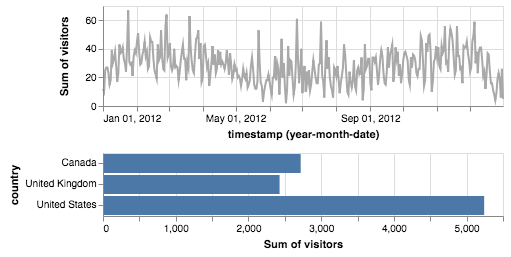

In [7]:
interval = alt.selection_interval(encodings=['x'],fields=['timestamp:T'])

timeline = alt.Chart(pageviews).mark_line().encode(
    x = alt.X('timestamp:T', timeUnit='yearmonthdate'),
    y = 'sum(visitors):Q',
    color = alt.value('darkgray')
).properties(
    height = 100
).add_selection(
    interval
)

bar = alt.Chart(pageviews).mark_bar().encode(
    x = 'sum(visitors)',
    y = 'country'
).transform_filter(
    interval
)

timeline & bar

## Bars filter timeline with single selection

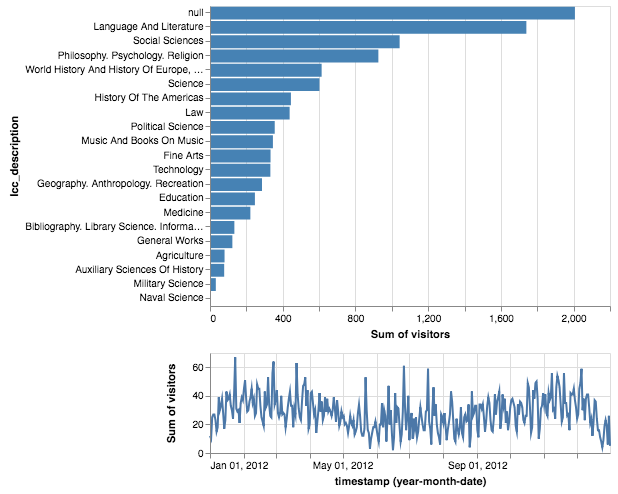

In [8]:
single = alt.selection_single(empty='all', fields=['lcc_description'])

bar = alt.Chart(pageviews).mark_bar().encode(
    x = 'sum(visitors)',
    y = alt.Y('lcc_description',
            sort=alt.EncodingSortField(
                field="visitors",
                op="sum",
                order="descending")
    ),
    color=alt.condition(single, alt.ColorValue("steelblue"), alt.ColorValue("lightgray")),
).properties(
    selection = single,
    height = 300
)

timeline = alt.Chart(pageviews).mark_line().encode(
    x = alt.X('timestamp:T', timeUnit='yearmonthdate'),
    y = 'sum(visitors):Q'
).transform_filter(
    single
).properties(
    height = 100
)

bar & timeline